<a href="https://colab.research.google.com/github/dahmansphi/code_ai_from_start_to_end/blob/main/healthcareProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

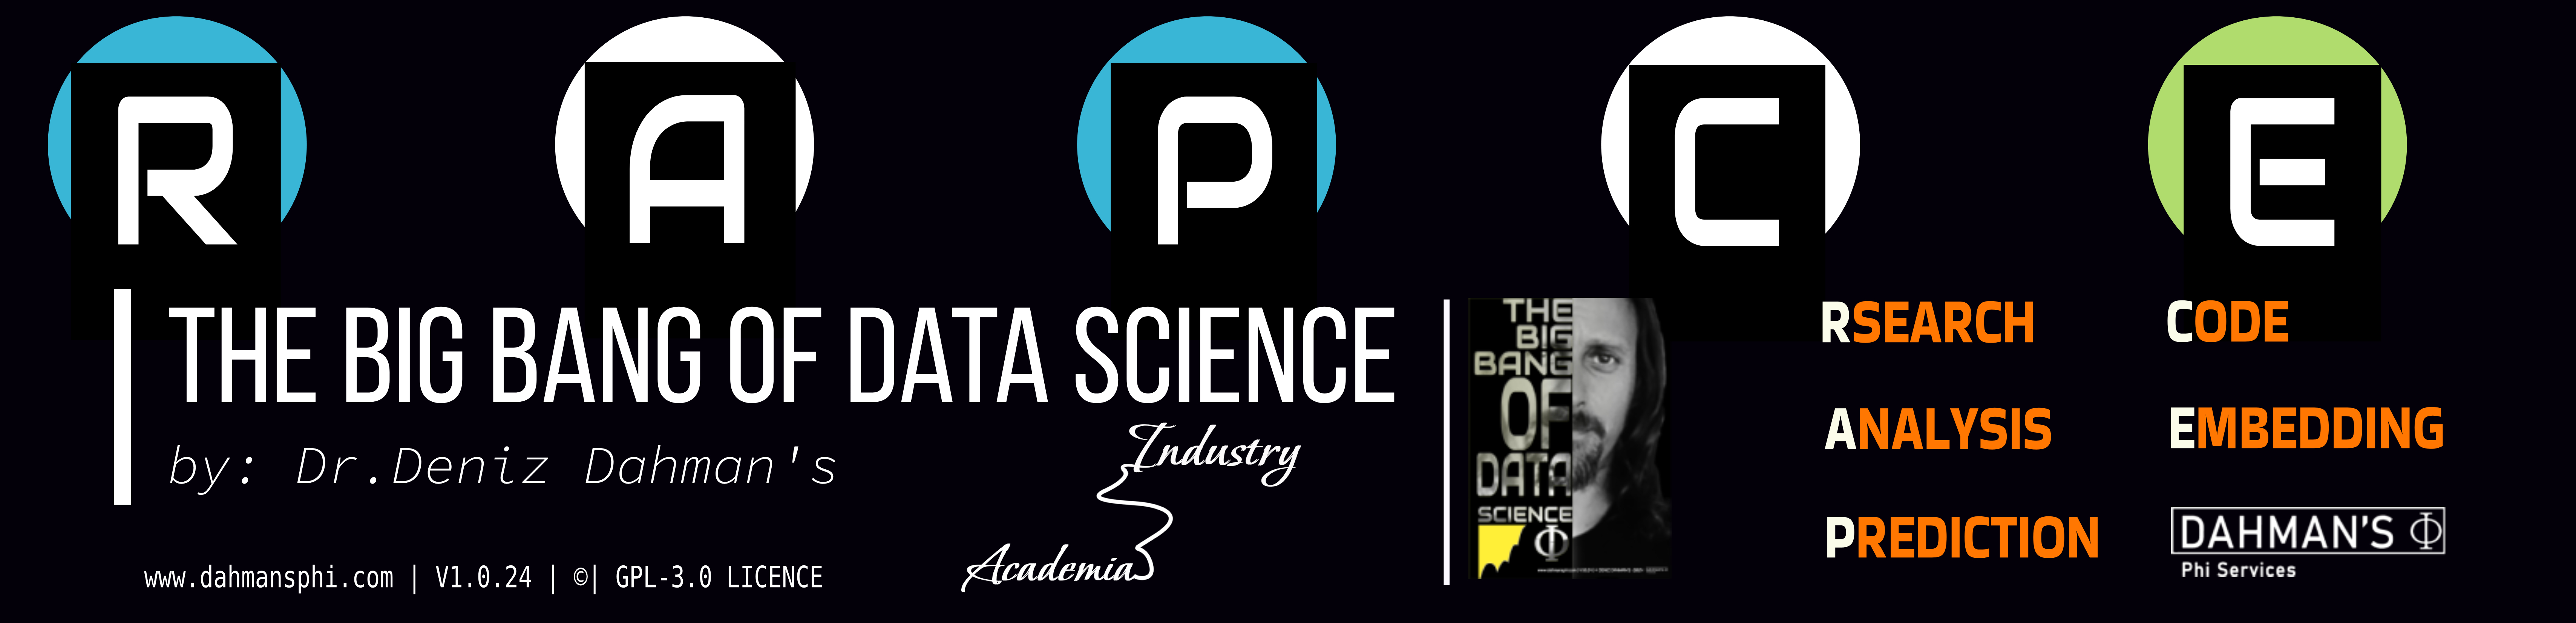


This is the fourth element of the Big Bang of Data Science, **Code AI** from the Start to The End.
I don’t want to stick to that abstract and direct definition from the academic book, on the meaning of coding, but from the industrial one. So, I believe CODING is a language syntax that machines use to communicate to or with. In other words, just like humans, machines use their own language, recently in the form of a digital form of [0, 1], to speak to each other or with us. So, if you code something it’s as if you are authoring a text, where the code is the structure and syntax of that language you author of, and the rules and structure of that language must be then obeyed. As if a text is authored using a human language, the form of outcome must be a book, or a paper, or similar forms; if you code using any programming language, then the outcome form is going to be a GUI form which can be of taking input as arguments and outcome results to screen, or just a script that execute certain tasks.

So, since we have established that level of understanding on the meaning of coding, then let us connect the dots with the aim of The Big Bang of Datat Science. In the main introduction of the big bang of data science, I have mentioned that the outcome from the first *two books: Research from the start to the end and analysis from the start to the end you have an analytical model which is used as an input to the third book prediction from the start to the end the outcome was a predictive model. Then I set the argument that we shall use this model in somehow; that was two possible ways: (a) as a backend to GUI interface, e.g. desktop app, mobile app, or desktop app. Alternatively, (b) we can use the model to embed it into a machine that machine then act as smart one so to speak.

In the first edition of the Big Bang of Data Science I have established the fact to transform this predictive model as a backend to a GUI interface. That is exactly the main aim of this material. Where we shall discuss how to fix this predictive model as a backend for an interface. We are going to use a specific form in this edition that GUI or interface shall be desktop application. However, this idea can span to other forms such as mobile app, or web app, but the concept is the same.

We are going to use a common programming language in this material, that is Python, however alternative options are possible as well. In addition, we shall utilize most of the CURD operations that standard operation apps would do, moreover, the utilization of Database structure, even though, the choice would be primitive, however it can span to more complicated scenarios. As you will most likely understand that Python is the language we write, so to transform that script into a GUI we can utilize available packages such as PyQt to accomplish that aim.

This **Notebook** contains the code implementation that is used during the recorded lectures to create the **predictive model** for the first project **HCC_v01**. The final outcome is an h5 model which will be used ***to predict the status of chest cancer***.

**[GPL-3.0 License](https://github.com/dahmansphi/code_ai_from_start_to_end/blob/main/LICENSE.txt)**

# Essential Libs

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from PIL import Image
import pathlib
from numpy import array
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img


In [ ]:
!apt-get install python3.11

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython3.11-minimal libpython3.11-stdlib mailcap mime-support python3.11-minimal
Suggested packages:
  python3.11-venv binfmt-support
The following NEW packages will be installed:
  libpython3.11-minimal libpython3.11-stdlib mailcap mime-support python3.11 python3.11-minimal
0 upgraded, 6 newly installed, 0 to remove and 24 not upgraded.
Need to get 5,813 kB of archives.
After this operation, 21.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 mailcap all 3.70+nmu1ubuntu1 [23.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 mime-support all 3.66 [3,696 B]
Get:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.11-minimal amd64 3.11.7-1+jammy1 [882 kB]
Get:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.11-

In [ ]:
from IPython.display import clear_output
clear_output()
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.11 1

update-alternatives: using /usr/bin/python3.11 to provide /usr/bin/python3 (python3) in auto mode


In [ ]:
!sudo update-alternatives  --set python3 /usr/bin/python3.11

In [ ]:
!python --version

Python 3.11.7


# View of the DS

1341 1341
(1611, 1964)


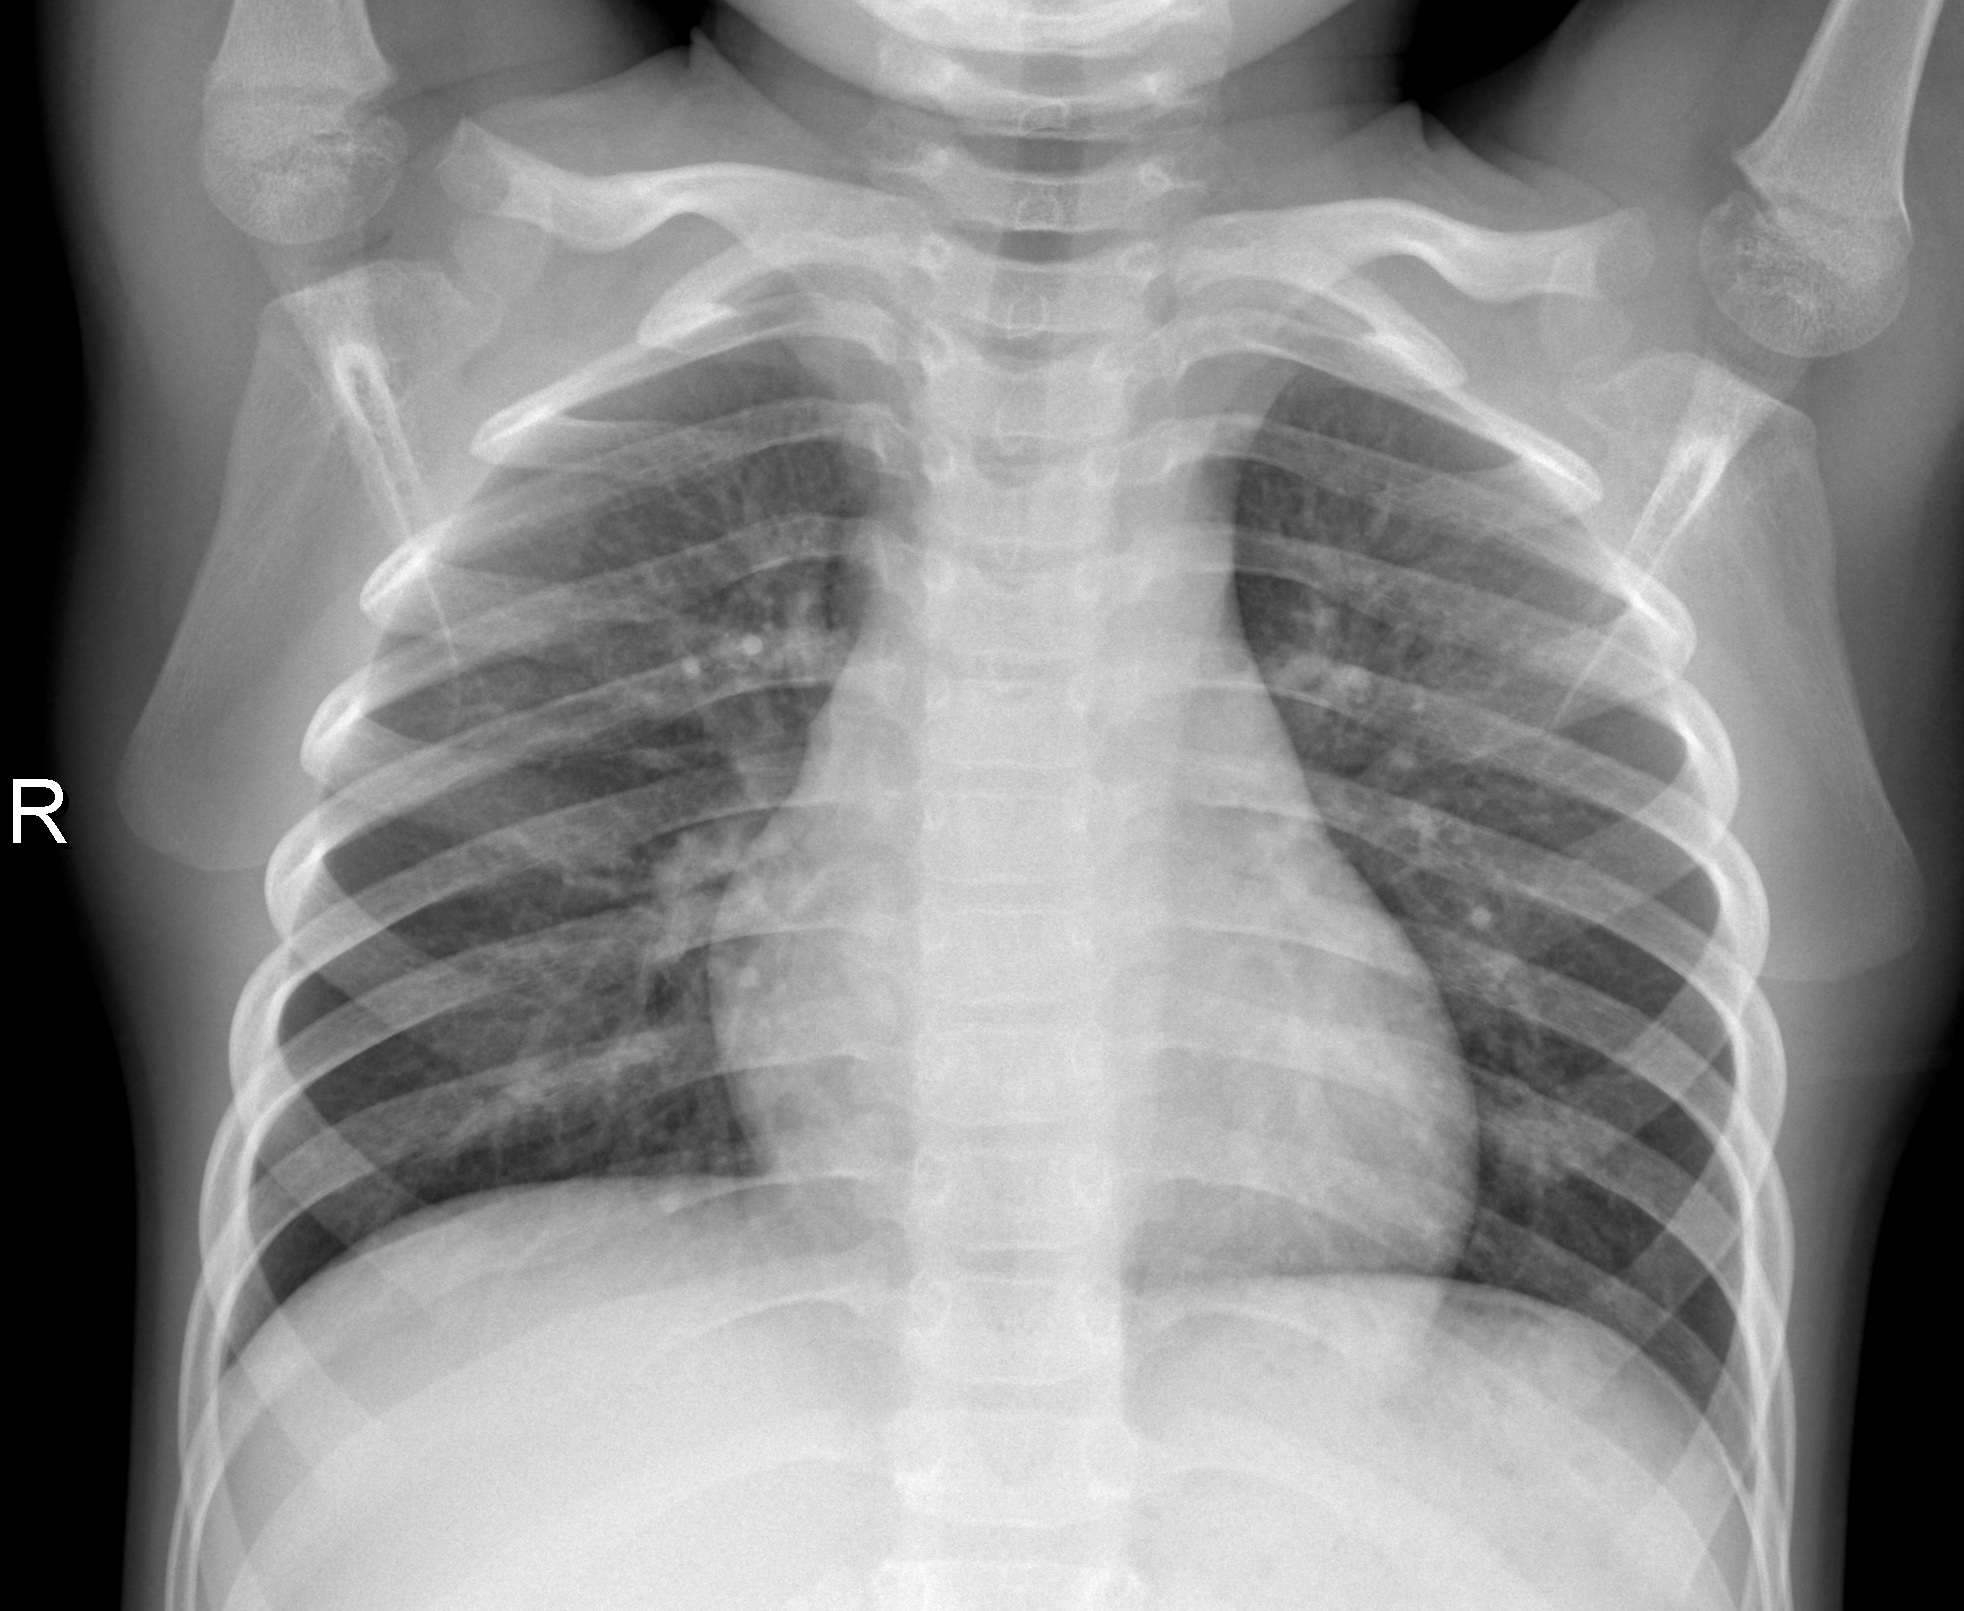

In [ ]:
pathPenumonia = '/content/drive/MyDrive/Colab Notebooks/bookFourContents/projectOneHealthcare/Dataset/chest_xray/train/PNEUMONIAF'
pathNormal = '/content/drive/MyDrive/Colab Notebooks/bookFourContents/projectOneHealthcare/Dataset/chest_xray/train/NORMAL'
# ######################################################
picsNormal = [f for f in pathlib.Path(pathNormal).glob("*.jpeg")] # these are normal
picsPneumonia = [f for f in pathlib.Path(pathPenumonia).glob("*.jpeg")] #these are Penumonia

im = Image.open(picsNormal[0])
ar = np.array(im)
print(len(picsNormal), len(picsPneumonia))

print(ar.shape)
im

# Save the DS as npy [Option]

In [ ]:
ss = np.array([[1,2,4], [1,2,4], [4,5,6], [1,2,4]])
row, col = ss.shape
print(row, col)

4 3


In [ ]:
# load normal vs pneumonia dataset, reshape and save to a new file
# define location of dataset
pathPenumonia = '/content/drive/MyDrive/Colab Notebooks/bookFourContents/projectOneHealthcare/Dataset/chest_xray/train/PNEUMONIAF'
pathNormal = '/content/drive/MyDrive/Colab Notebooks/bookFourContents/projectOneHealthcare/Dataset/chest_xray/train/NORMAL'

finalTrainfolder = '/content/drive/MyDrive/Colab Notebooks/bookFourContents/projectOneHealthcare/Dataset/train/'
oneimg = '/content/drive/MyDrive/Colab Notebooks/bookFourContents/projectOneHealthcare/Dataset/chest_xray/train/NORMAL/NORMAL2-IM-1423-0001.jpeg'
# *********************************

photos, labels = list(), list()

# enumerate files in the directory function
def dsCreat(path, output):
  # loop over normal Folder
  ind = 0
  for file in listdir(path):
    # determine class
    output = output
    # load image
    try:
      photo = load_img(path + '/' + file, target_size=(30, 30))
      ind += 1
      # convert to numpy array
      photo = np.array(photo)
      # store
      photos.append(photo)
      labels.append(output)
    except:
      print('wrong', ind)


image = Image.open(oneimg)

print(image.format)
print(image.mode)
imh, imw = image.size
print(imh, imw)
im = image.resize((30, 30))

print(im.format)
print(im.size)
print(im.mode)


arr = asarray(im)
print(arr.shape)
fl = arr.flatten()
print(fl.shape)
im

# # Excute both paths normal and pneumonia
# dsCreat(path=pathNormal, output=0.0)
# dsCreat(path=pathPenumonia, output=1.0)

# # convert to a numpy arrays
# photos = asarray(photos)
# labels = asarray(labels)
# print(photos.shape, labels.shape)

# # save the reshaped photos
# # dsTrain = finalTrainfolder + 'normal_vs_pneumonia.npy'
# # dsLabel = finalTrainfolder + 'normal_vs_pneumonia_labels.npy'
# # save(dsTrain, photos)
# # save(dsLabel, labels)


JPEG
L
1400 1216
None
(30, 30)
L
(30, 30)
(900,)


# Model Train & Test stage

In [ ]:
# baseline model with data augmentation for the normal vs pneumonia dataset [Option ONE STRUCTURE]

trainPath = '/content/drive/MyDrive/Colab Notebooks/bookFourContents/projectOneHealthcare/Dataset/chest_xray/train/'
testPath = '/content/drive/MyDrive/Colab Notebooks/bookFourContents/projectOneHealthcare/Dataset/chest_xray/test/'
# baseline model with data augmentation for the normal vs pneumonia dataset
import sys
from keras.callbacks import Callback
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD, RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator

class MyThresholdCallback(Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        accuracy = logs["val_accuracy"]
        if accuracy >= self.threshold:
            self.model.stop_training = True

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	# opt = Adam(learning_rate=0.001)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generators
	train_datagen = ImageDataGenerator(rescale=1.0/255.0,
		width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	test_datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = train_datagen.flow_from_directory(trainPath, color_mode="grayscale", class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = test_datagen.flow_from_directory(testPath, color_mode="grayscale", class_mode='binary', batch_size=64, target_size=(200, 200))
	# fit model
	my_callback = MyThresholdCallback(threshold=0.87)
	history = model.fit(train_it, steps_per_epoch=len(train_it), validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1, callbacks=[my_callback])
	# evaluate model
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))

# entry point, run the test harness
run_test_harness()

In [ ]:
# Alternative Structure
# baseline model with data augmentation for the normal vs pneumonia dataset [Option ONE STRUCTURE]
# *****************************************************************************************************
trainPath = '/content/drive/MyDrive/Colab Notebooks/bookFourContents/projectOneHealthcare/Dataset/chest_xray/train/'
testPath = '/content/drive/MyDrive/Colab Notebooks/bookFourContents/projectOneHealthcare/Dataset/chest_xray/test/'

import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten, Dropout, BatchNormalization
from keras.optimizers import SGD, RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
  model = Sequential()

  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
  model.add(MaxPooling2D((2, 2)))

  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))

  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))

  model.add(Flatten())
  model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(1, activation='sigmoid'))

  # compile model
  opt = Adam(learning_rate=0.001)
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  return model


# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generators
	train_datagen = ImageDataGenerator(rescale=1.0/255.0,
		width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	test_datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = train_datagen.flow_from_directory(trainPath, class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = test_datagen.flow_from_directory(testPath, class_mode='binary', batch_size=64, target_size=(200, 200))
	# fit model
	history = model.fit(train_it, steps_per_epoch=len(train_it), validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
	# evaluate model
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))

# entry point, run the test harness
run_test_harness()

# *****************************************************************************************************

# Select the Structure and Save the model

In [ ]:
# baseline model with data augmentation for the normal vs pneumonia dataset [Option ONE STRUCTURE]

trainPath = '/content/drive/MyDrive/Colab Notebooks/bookFourContents/projectOneHealthcare/Dataset/chest_xray/train/'
saveModelPath = '/content/drive/MyDrive/Colab Notebooks/bookFourContents/projectOneHealthcare/Dataset/Model_01_HCC_B4/'

# baseline model with data augmentation for the normal vs pneumonia dataset
import sys
from keras.callbacks import Callback
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD, RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	# opt = SGD(learning_rate=0.001, momentum=0.9)
	opt = Adam(learning_rate=0.001)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# run the test harness for evaluating a model
def run_test_harness():
	model = define_model()
	# create data generators
	train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	# prepare iterators
	train_it = train_datagen.flow_from_directory(trainPath, color_mode="grayscale", class_mode='binary', batch_size=64, target_size=(200, 200))
	# fit model
	history = model.fit(train_it, steps_per_epoch=len(train_it), epochs=10, verbose=1)
	# save the model
	model.save(saveModelPath + 'HCC_B4_01.h5')

	#  report the model acc
	acc = history.history['accuracy']
	print(f'accuracy is: {acc}')


# entry point, run the test harness
run_test_harness()


# Resize Images

In [ ]:
pathImgsNormal = '/content/drive/MyDrive/Colab Notebooks/bookFourContents/projectOneHealthcare/Dataset/chest_xray/test/NORMAL/'
pathImgsPNEUMONIA = '/content/drive/MyDrive/Colab Notebooks/bookFourContents/projectOneHealthcare/Dataset/chest_xray/test/PNEUMONIA/'

pathSaveNormal = '/content/drive/MyDrive/Colab Notebooks/bookFourContents/projectOneHealthcare/Dataset/chest_xray/val_200/NORMAL/'
pathSavePemonia = '/content/drive/MyDrive/Colab Notebooks/bookFourContents/projectOneHealthcare/Dataset/chest_xray/val_200/PNEMONIA/'

In [ ]:
import os
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

modelpath = '/content/drive/MyDrive/Colab Notebooks/bookFourContents/projectOneHealthcare/Dataset/Model_01_HCC_B4/HCC_B4_01.h5'
model = load_model(modelpath)

limg = os.listdir(pathImgsPNEUMONIA)
filename = pathImgsPNEUMONIA + limg[20]

img = load_img(filename, target_size=(200, 200, 1), color_mode='grayscale')
# convert to array
img = img_to_array(img)
# img.shape
# # reshape into a single sample with 3 channels
img = img.reshape(1, 200, 200, 1)
(model.predict(img)[0][0])


1/1 [==============================] - 0s 106ms/step


1.0

In [ ]:
import os
from PIL import Image
import numpy as np

listImgsNormal = os.listdir(pathImgsNormal)
listImgsPnemonia = os.listdir(pathImgsPNEUMONIA)

image = Image.open(pathImgsNormal + listImgsNormal[0])
new_image = image.resize((200, 200))
new_image
ss = np.array(new_image)
ff = ss.flatten()
mm = ff.reshape(1,200,200,1)
model.predict(mm)
# for img in listImgsPnemonia:
#   image = Image.open(pathImgsPNEUMONIA + img)
#   new_image = image.resize((200, 200))
#   new_image.save(pathSavePemonia + img)

1/1 [==============================] - 0s 30ms/step


array([[0.]], dtype=float32)

In [ ]:
!pip install h5py

In [ ]:
!python --version

Python 3.10.12
